In [20]:
# Importing libraries

library(dplyr)
library(tidyverse)

In [21]:
# Import the data and look at the it

mortality_df <- read.csv(file = 'fin_dataset.csv')
mortality_df <- mortality_df[3:10]
#dim(prostrate_df)
head(mortality_df)

,Health.Expenditure,Out.pocket.expenditure,Education.expenditure,Number.physicians,Mortality.rate,Female.Literacy,Open.defecation,Manage.water
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.569672,78.99665,3.47945,0.2365,NA,NA,NA,NA
2,8.561907,73.25517,3.46201,0.2518,83.9,17.01784,17.66914,19.96687
3,8.805964,72.04787,3.45446,0.2846,NA,NA,NA,NA
4,9.528878,73.05592,3.69522,0.2983,NA,NA,NA,NA
5,10.105348,78.38229,3.25580,0.2850,NA,NA,NA,NA
6,10.962000,75.97433,3.51198,0.2782,NA,NA,NA,NA


In [22]:
summary(mortality_df)
sum(is.na(mortality_df))

 Health.Expenditure Out.pocket.expenditure Education.expenditure
 Min.   : 1.028     Min.   : 3.307         Min.   : 0.7874      
 1st Qu.: 4.781     1st Qu.:18.533         1st Qu.: 3.3825      
 Median : 6.554     Median :29.511         Median : 4.5397      
 Mean   : 6.526     Mean   :33.326         Mean   : 4.5979      
 3rd Qu.: 8.253     3rd Qu.:44.741         3rd Qu.: 5.5463      
 Max.   :13.281     Max.   :84.348         Max.   :14.0591      
 NA's   :169        NA's   :169            NA's   :169          
 Number.physicians Mortality.rate   Female.Literacy  Open.defecation  
 Min.   :0.0008    Min.   :  1.00   Min.   :  1.00   Min.   : 0.0012  
 1st Qu.:0.7203    1st Qu.:  8.10   1st Qu.: 71.77   1st Qu.: 1.0000  
 Median :2.1717    Median : 17.75   Median : 91.87   Median : 1.9033  
 Mean   :2.0989    Mean   : 29.00   Mean   : 81.82   Mean   : 8.3802  
 3rd Qu.:3.2980    3rd Qu.: 31.90   3rd Qu.: 96.24   3rd Qu.: 7.7629  
 Max.   :7.7778    Max.   :185.10   Max.   :100.00   M

[1] 5172

In [23]:
complete_data <- mortality_df %>% drop_na()
dim(complete_data)

[1] 195   8

In [24]:
sum(is.na(complete_data))

[1] 0

In [28]:
# Dividing the data for training samples

set.seed(1)

train = sample(1:nrow(complete_data), .70*nrow(complete_data))
# nrow(prostrate_df)
names(complete_data)

[1] "Health.Expenditure"     "Out.pocket.expenditure" "Education.expenditure" 
[4] "Number.physicians"      "Mortality.rate"         "Female.Literacy"       
[7] "Open.defecation"        "Manage.water"

In [30]:
# Selecting the response value for fitting

Y.train <- complete_data$Mortality.rate[train]
Y.test <- complete_data$Mortality.rate[-train]

In [31]:
# The training data is selected

X_train <- complete_data[train,]
X_test <- complete_data[-train,]

In [32]:
# Selecting the top predictors from the full model and splitting into test and train:

training = complete_data[train, ]
testing = complete_data[-train, ]

#head(training)

In [33]:
# Best model selection

library(leaps)

mortality_best = regsubsets(Mortality.rate ~., data = training, method = 'exhaustive', nvmax = 6)
my_sum <- summary(mortality_best)

my_sum

Subset selection object
Call: regsubsets.formula(Mortality.rate ~ ., data = training, method = "exhaustive", 
    nvmax = 6)
7 Variables  (and intercept)
                       Forced in Forced out
Health.Expenditure         FALSE      FALSE
Out.pocket.expenditure     FALSE      FALSE
Education.expenditure      FALSE      FALSE
Number.physicians          FALSE      FALSE
Female.Literacy            FALSE      FALSE
Open.defecation            FALSE      FALSE
Manage.water               FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: exhaustive
         Health.Expenditure Out.pocket.expenditure Education.expenditure
1  ( 1 ) " "                " "                    " "                  
2  ( 1 ) " "                " "                    " "                  
3  ( 1 ) " "                "*"                    " "                  
4  ( 1 ) "*"                "*"                    " "                  
5  ( 1 ) "*"                "*"                    "*"            

In [34]:
names(my_sum)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [35]:
# Number of significant predictors per BIC: 3 and number of significant predictors per CP:3
which.min(my_sum$bic)
which.min(my_sum$cp)

[1] 3

[1] 4

In [36]:
# Checking the output matrix

my_sum$outmat

,Health.Expenditure,Out.pocket.expenditure,Education.expenditure,Number.physicians,Female.Literacy,Open.defecation,Manage.water
1 ( 1 ),,,,,,*,
2 ( 1 ),,,,,*,*,
3 ( 1 ),,*,,,*,*,
4 ( 1 ),*,*,,,*,*,
5 ( 1 ),*,*,*,,*,*,
6 ( 1 ),*,*,*,*,*,*,


In [37]:
select = my_sum$outmat

In [39]:
# Cross validation for k = 5 and k = 10

library(boot)
set.seed(1)

cv.error.k5.store <- c()
cv.error.k10.store <- c()

for(i in 1:6){
    
  temp <- which(select[i,]=="*")
    
  cv.data <- complete_data[,c(5,temp)]
    
  cv.glm <- glm(Mortality.rate ~.,data =cv.data)
    
  cv.error.k5 <- cv.glm(cv.data, cv.glm, K=5)$delta[2]
    
  cv.error.k10 <- cv.glm(cv.data, cv.glm, K=10)$delta[2]
    
  cv.error.k5.store <- c(cv.error.k5.store,cv.error.k5)
    
  cv.error.k10.store <- c(cv.error.k10.store,cv.error.k10)
}

cv.error.k5.store
cv.error.k10.store

[1]  3.256670e+02  1.254729e-28  8.130865e-28 -5.583573e-29  3.784366e-28
[6]  7.942666e-30

[1]  3.361063e+02  2.084603e-28  7.772147e-28 -2.122247e-29  2.456752e-28
[6] -9.875928e-30

In [40]:
which.min(cv.error.k5.store)

which.min(cv.error.k10.store)

[1] 4

[1] 4

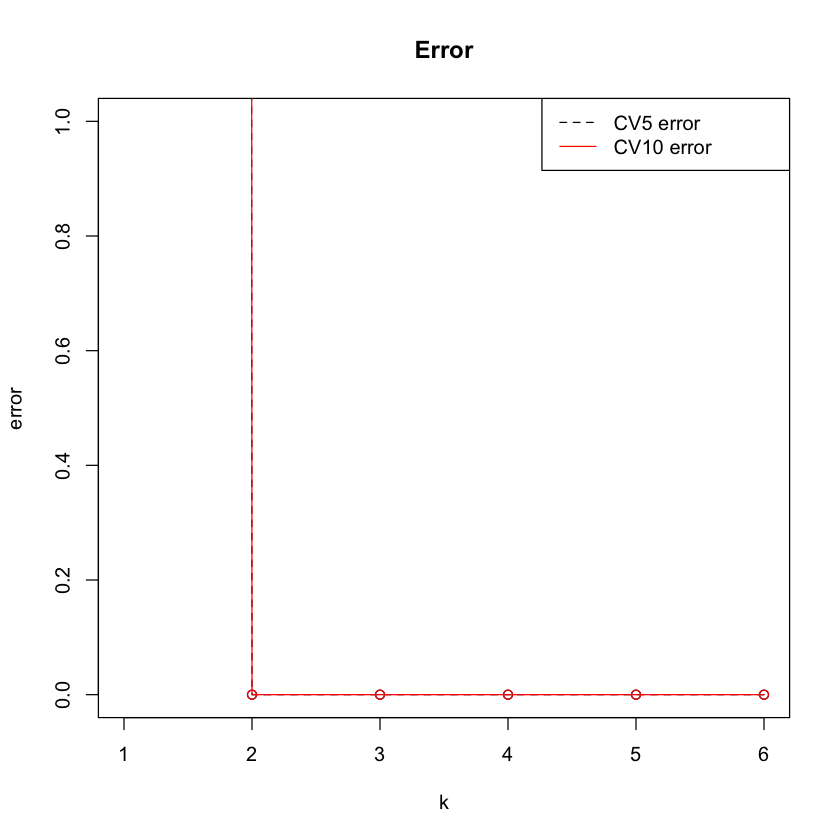

In [41]:
quartz()

plot(cv.error.k5.store,type="o",lty=2,col = "black",ylim = c(0,1),xlab = "k",ylab="error",main="Error")

lines(cv.error.k10.store,type="o",lty=1,col="red")

legend("topright",c("CV5 error", "CV10 error"),lty=c(2,1),col=c("black","red"))

In [47]:
# Subset selection with AIC and BIC:

select = my_sum$outmat

train.error.store = c()
test.error.store = c()
aic.matrix = c()
bic.matrix = c()

for (i in 1:6){
    temp <- which(select[i,] == "*")
    reduce.training <- training[,c(5,temp)]
    reduce.test <- testing[,c(5,temp)]
    
    red.fit <- lm(Mortality.rate ~., data = reduce.training)
    
    aic <- AIC(red.fit)
    bic <- BIC(red.fit)
    
    pred.train <- predict(red.fit, newdata = reduce.training)
    pred.test <- predict(red.fit, newdata = reduce.test)
    
    train.error <- (1/length(Y.train))*sum(pred.train-Y.train)^2 
    test.error <- (1/length(Y.test))*sum(pred.test-Y.test)^2 
    
    train.error.store = c(train.error.store, train.error)
    test.error.store = c(test.error.store, test.error)
    
    aic.matrix <- c(aic.matrix,aic)
    bic.matric <- c(bic.matrix,bic)
}

In [48]:
# Training and test error from best model selection
train.error.store
test.error.store

[1] 1.221227e-26 9.081335e-29 3.254618e-28 1.136888e-30 4.190824e-31
[6] 3.712287e-31

[1] 7.916903e+00 1.032474e-28 3.574242e-28 7.272311e-29 2.707531e-31
[6] 2.436778e-30

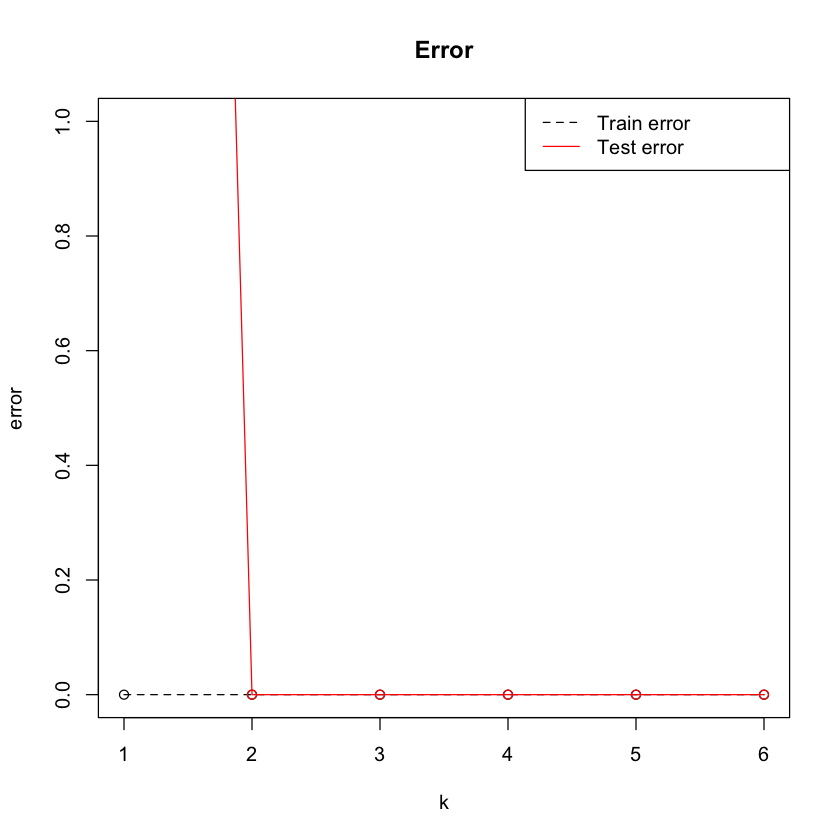

In [49]:
quartz()

plot(train.error.store,type="o",lty=2,col = "black",ylim = c(0,1),xlab = "k",ylab="error",main="Error")

lines(test.error.store,type="o",lty=1,col="red")

legend("topright",c("Train error", "Test error"),lty=c(2,1),col=c("black","red"))

In [50]:
# Bootstrap .632 -

theta.fit <- function(X, Y){
    lsfit(X,Y)
}

In [46]:
theta.predict <- function(fit, X){
    cbind(1, X)%*%fit$coef
}

In [63]:
square.error <- function(Y, Yhat){
    (Y-Yhat)^2
}

In [64]:
# Create X and Y

mortality_df_cols <- complete_data[,c(1,2,3,4,6,7,8)]

X <- mortality_df_cols
Y <- complete_data[,5]

In [65]:
library(bootstrap)

In [66]:
# Best susbset of K and storing the error

select = my_sum$outmat
error.store = c()

for (i in 1:6){
    temp <- which(select[i,] == "*")
    
    res <- bootpred(X[,temp], Y ,nboot = 50, theta.fit = theta.fit, theta.predict = theta.predict, err.meas = square.error)
    
    error.store <- c(error.store, res[[3]])
}

In [67]:
# Error - generalized
error.store

[1] 327.7921 263.7544 247.4868 239.8498 245.3640 246.9403

In [68]:
temp

Health.Expenditure Out.pocket.expenditure  Education.expenditure 
                     1                      2                      3 
     Number.physicians        Female.Literacy        Open.defecation 
                     4                      5                      6

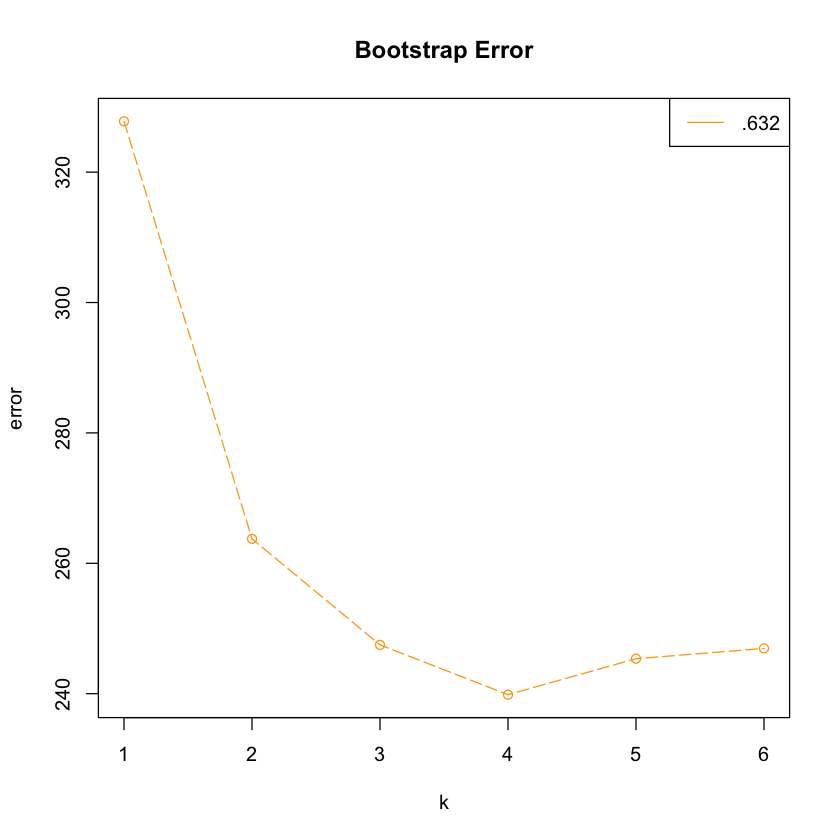

In [69]:
quartz()
plot(error.store,type="o",lty=5,col="orange",main="Bootstrap Error",xlab = "k",ylab="error")
legend("topright",c(".632"),lty=1,col=c("orange"))

In [72]:
#install.packages('bestglm')
library(bestglm)

AIC.matrix <- within(training, {
Health.Expenditure <- Health.Expenditure
Out.pocket.expenditure <- Out.pocket.expenditure
Number.physicians <- Number.physicians
Female.Literacy <- Female.Literacy
Open.defecation <- Open.defecation
y <- Mortality.rate
Mortality.rate <- NULL })

fit.aic <- bestglm(Xy =AIC.matrix, family = gaussian, IC = "AIC", method = "exhaustive")

# The value of AIC is :

min(fit.aic$BestModels$Criterion)

[1] 743.2732

In [73]:
# The 3 predictors are -  lcavol, lweight and svi

fit.aic$BestModels[which(fit.aic$BestModels$Criterion == min(fit.aic$BestModels$Criterion)), ]

,Health.Expenditure,Out.pocket.expenditure,Education.expenditure,Number.physicians,Female.Literacy,Open.defecation,Manage.water,Criterion
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
1,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,743.2732


In [75]:
### Import libraries
#install.packages("randomForest")
library(randomForest)
library(ggplot2)

set.seed(4543)

rf.fit <- randomForest(Mortality.rate ~ ., data = complete_data, type = "regression", ntree = 1000, keep.forest = TRUE, importance = TRUE)

In [76]:
rf.fit


Call:
 randomForest(formula = Mortality.rate ~ ., data = complete_data,      type = "regression", ntree = 1000, keep.forest = TRUE, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 2

          Mean of squared residuals: 269.601
                    % Var explained: 69.88

In [77]:
ImpData <- as.data.frame(importance(rf.fit))
ImpData$Var.Names <- row.names(ImpData)

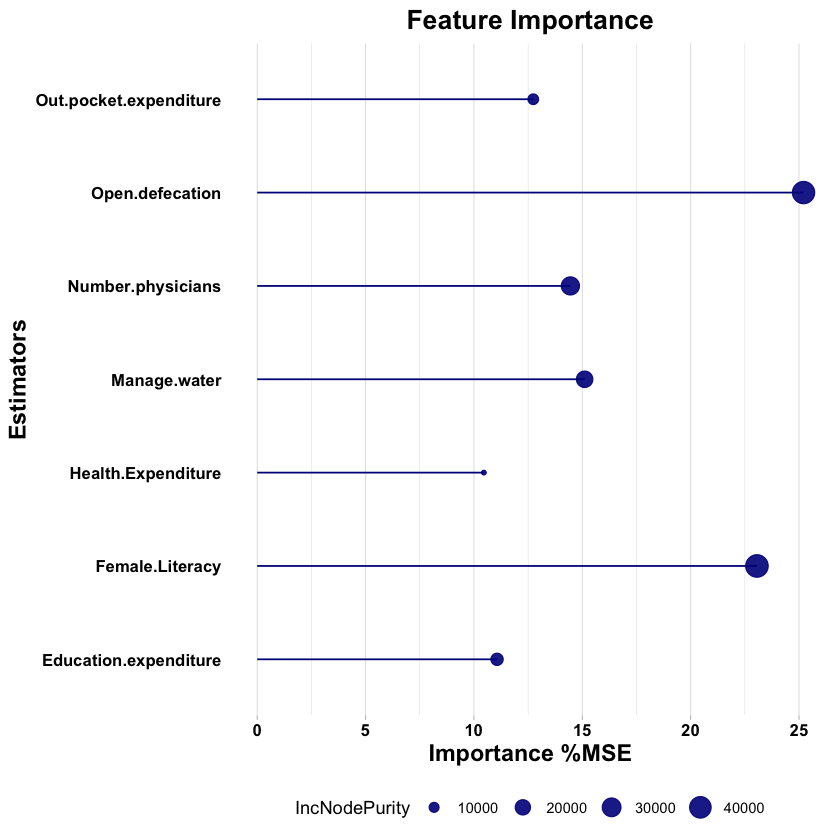

In [143]:
#install.packages("ggeasy")
library(ggeasy)
ggplot(ImpData, aes(x=Var.Names, y=`%IncMSE`)) + 
    ggtitle("Feature Importance")+
  xlab("Estimators") + ylab("Importance %MSE")+
  geom_segment( aes(x=Var.Names, xend=Var.Names, y=0, yend=`%IncMSE`), color="darkblue") +
  geom_point(aes(size = IncNodePurity), color="darkblue", alpha=0.9) +
  theme_light() +
  coord_flip() +
  theme(
    legend.position="bottom",
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank(),
    plot.title = element_text(hjust = 0.5,size=16, face="bold"),
    axis.title.x = element_text(color="black", size=14, face="bold"),
    axis.title.y = element_text(color="black", size=14, face="bold"),
    axis.text.x = element_text(face = "bold", size = 10, color = "black"),
    axis.text.y = element_text(face = "bold", size = 10, color = "black")
  )

In [97]:
rmse = sqrt(mean(rf.fit$mse))
print(rmse)
print(mean(rf.fit$rsq))

[1] 16.30814
[1] 0.7028526


In [88]:
data <- data.frame(pred = predict(rf.fit), actual = complete_data$Mortality.rate)


In [89]:
head(data)

,pred,actual
,<dbl>,<dbl>
1,77.15357,83.9
2,19.17371,25.8
3,16.43135,23.8
4,22.91001,29.2
5,21.32475,17.6
6,29.87532,1.0


In [92]:
y_pred = predict(rf.fit)

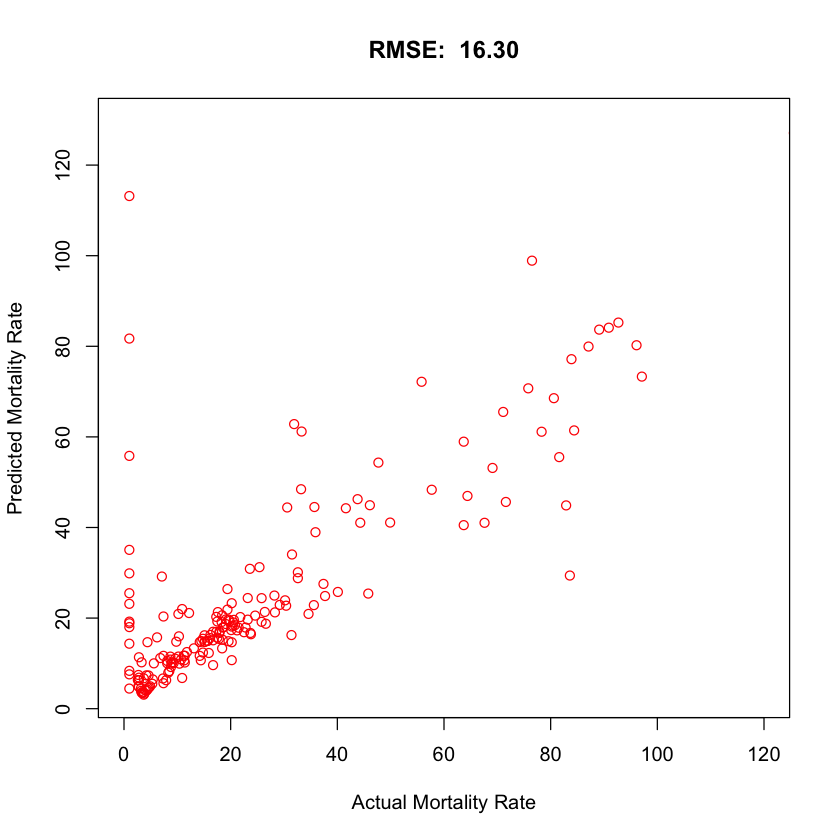

In [107]:
plot(x = complete_data$Mortality.rate, y = y_pred,
     xlim = c(0,120),
     xlab='Actual Mortality Rate',
     ylab='Predicted Mortality Rate',
     main='RMSE:  16.30',col = "red")
